In [6]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import astropy.units as u
import astropy.constants as c
%matplotlib inline

cloud  = 'M3'
fjeans = ['04','08','32']

#dturb  = '/Volumes/2TB-BACKUP/turbulence/strucfunc/vsfhr'
dturb  = '/Users/roxanachira/Dropbox/chira2018/pics/data/vsfhr'

ms = 10
lw = 7
color = ['red','green','blue']

ylimzeta = [-0.5,3.5]
ylimz    = [ 0.0,1.2]

In [7]:
ifile = glob(('%s%s/zeta_fitted_%s.out' % (dturb,fjeans[0],cloud)) )[0]
t04,zeta104,zeta204,zeta304 = np.array([]),np.array([]),np.array([]),np.array([])
t04,zeta104,zeta204,zeta304 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)

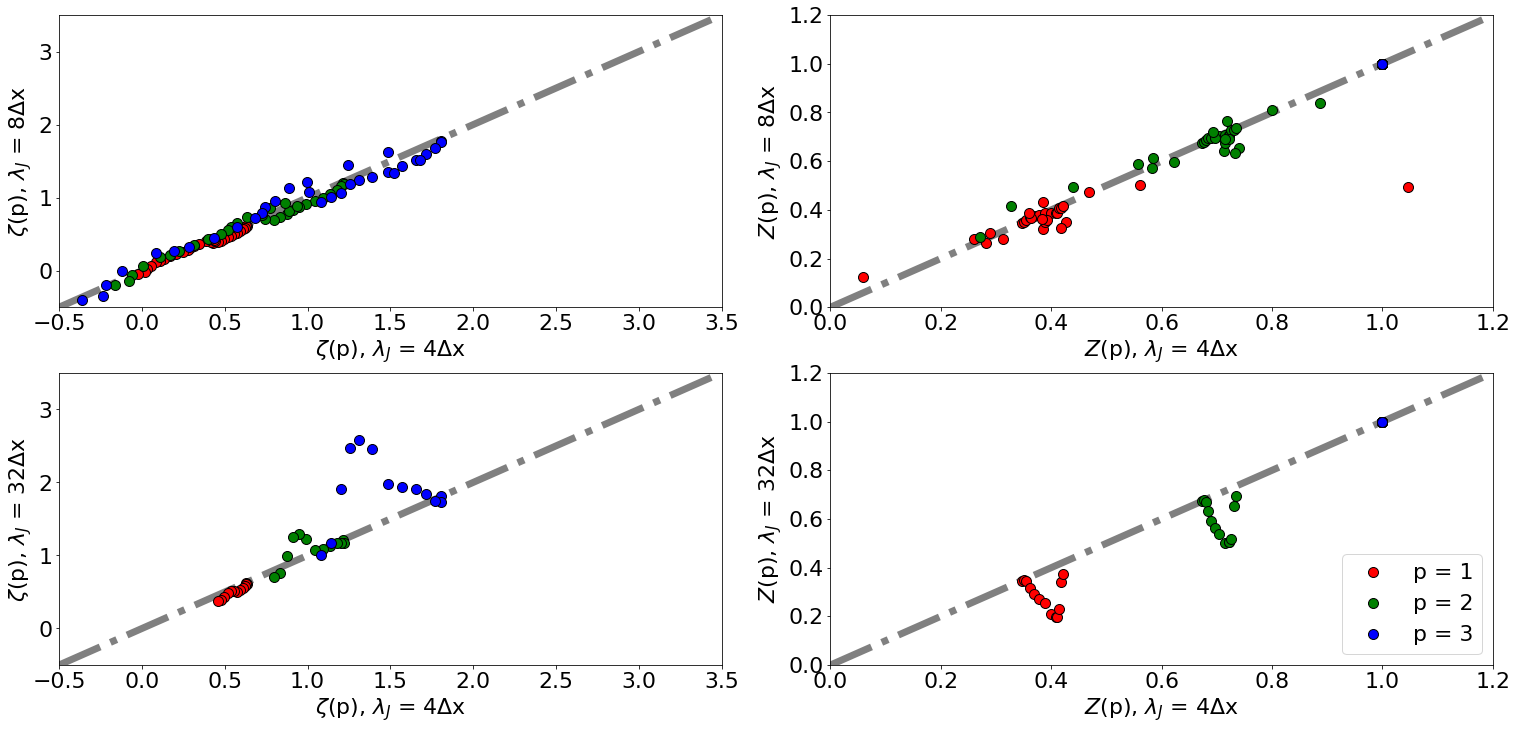

In [9]:
plt.close()
plt.rcParams['font.size'] = 22

fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(21,10))
for ijeans in range(len(fjeans)-1):
    ifile = glob(('%s%s/zeta_fitted_%s.out' % (dturb,fjeans[ijeans+1],cloud)) )[0]
    t,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    t,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    ax[ijeans,0].plot(ylimzeta,ylimzeta,ls='-.',lw=lw,color='grey')
    ax[ijeans,1].plot(ylimz,ylimz,ls='-.',lw=lw,color='grey')
    
    span = len(t)
    
    for p in range(1,4):
        if(p==1): 
            zetax = zeta104[0:span]
            zetay = zeta1
        if(p==2): 
            zetax = zeta204[0:span]
            zetay = zeta2
        if(p==3): 
            zetax = zeta304[0:span]
            zetay = zeta3
            
        ax[ijeans,0].plot(zetax,zetay,marker='o',ls='',markeredgecolor='black',ms=ms,lw=lw,color=color[p-1])
        ax[ijeans,1].plot(zetax/zeta304[0:span],zetay/zeta3,marker='o',ls='',markeredgecolor='black',ms=ms,lw=lw,color=color[p-1],label=("p = %i" % p))
        
    ax[ijeans,0].set_xlim(ylimzeta)
    ax[ijeans,0].set_ylim(ylimzeta)
    ax[ijeans,1].set_xlim(ylimz)
    ax[ijeans,1].set_ylim(ylimz)
    ax[ijeans,0].set_xlabel('$\zeta$(p), $\lambda_J$ = 4$\Delta$x')
    ax[ijeans,1].set_xlabel('$Z$(p), $\lambda_J$ = 4$\Delta$x')
    ax[ijeans,0].set_ylabel(('$\zeta$(p), $\lambda_J$ = %i$\Delta$x' % (int(fjeans[ijeans+1]))))
    ax[ijeans,1].set_ylabel(('$Z$(p), $\lambda_J$ = %i$\Delta$x' % (int(fjeans[ijeans+1]))))
    
ax[1,1].legend(loc=4)
    
fig.tight_layout(pad=0.2)
fig.savefig('comp_jeans.pdf')